In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### You can download Titanic dataset from Kaggle or use seaborn's built-in dataset
#### For simplicity, we'll use seaborn

In [ ]:

import seaborn as sns
titanic = sns.load_dataset('titanic')

In [3]:
# Display first few rows
print("Dataset Shape:", titanic.shape)
titanic.head()

Dataset Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##### Data Preprocessing 

In [ ]:
# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

# Drop rows with missing target
titanic = titanic.dropna(subset=[target]).copy()

# Fill missing values safely
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Encode categorical variables
titanic['sex'] = LabelEncoder().fit_transform(titanic['sex'])
titanic['embarked'] = LabelEncoder().fit_transform(titanic['embarked'])

X = titanic[features]
y = titanic[target]

##### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#  Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model Training

# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [11]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
#Evaluation Function

def evaluate_model(y_true, y_pred, model_name):
    print(f"📌 {model_name} Results")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

📌 Logistic Regression Results
Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



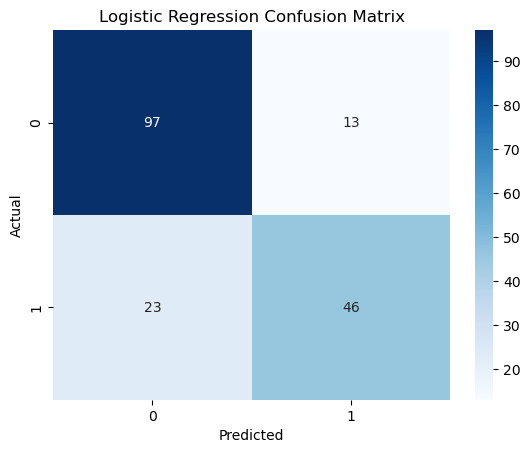

In [13]:
# Logistic Regression
evaluate_model(y_test, y_pred_log, "Logistic Regression")

📌 Random Forest Results
Accuracy: 0.8268156424581006

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



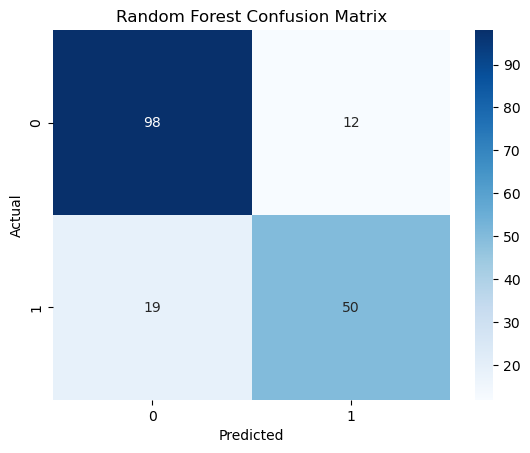

In [14]:
# Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")